First, we load our data.  This time, I'm adding a column of 1s directly to the dataframe, so that it's already there later on when we want to build new sets of training data.

 - note on binarize
 - matrix treatment

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')
data.insert(0, '1', 1)

X = data.as_matrix(columns=['1', 'alcohol', 'ash'])
y = np.matrix(label_binarize(data['class'], [1, 2, 3]))[:,0]

 - train / test sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('train:', len(X_train), 'test:', len(X_test))

xt1 = X_train
yt1 = y_train
xtt1 = X_test
ytt1 = y_test

train: 142 test: 36


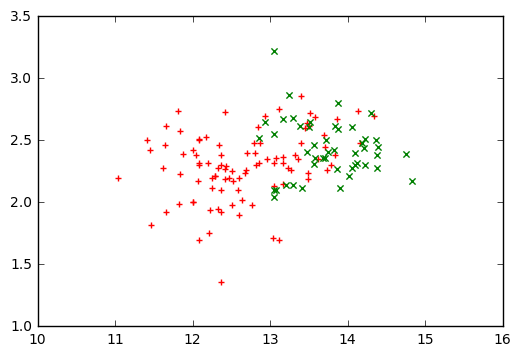

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+', 'x', '.']
COLORS = ['red', 'green', 'blue']

def filter_by_label(X, y, value):
    return np.matrix([X[i,:] for i in range(len(X)) if y[i,0] == value])

def plot_points(xy, labels):
    
    for i, label in enumerate(set(labels.A.flatten())):
        points = np.matrix([xy[j,:] for j in range(len(xy)) if labels[j,0] == label])
        marker = MARKERS[i % len(MARKERS)]
        color = COLORS[i % len(COLORS)]
        plt.scatter(points[:,0], points[:,1], marker=marker, color=color)

plot_points(X_train[:,1:3], y_train)

In [25]:
import numpy as np

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def cost(theta, X, y):
    theta = np.matrix(theta)
    
    h = sigmoid(np.matmul(X, theta.T))
    y1 = np.multiply(-y, np.log(h))
    y0 = np.multiply((1 - y), np.log(1 - h))
    j = np.sum(y1 - y0) / (len(X))
    print(j)
    return j

def gradient(theta, X, y):
    error = sigmoid(X * np.matrix(theta).T) - y
    grad = (1/len(X)) * np.matmul(X.T, error)
    print(grad)
    
    return grad

In [19]:
from scipy.optimize import fmin_tnc  

result = fmin_tnc(func=cost, x0=np.zeros(3), fprime=gradient, args=(X_train, y_train))
theta = result[0]

print('theta: ', theta)
print('cost:', cost(theta, X, y))

theta:  [-36.9515516    2.64955033   0.476558  ]
cost: 0.366667501345


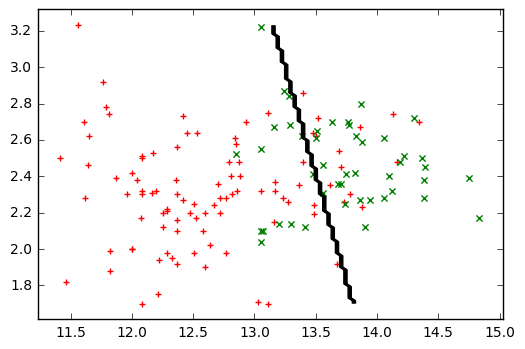

In [6]:
from matplotlib import cm

def predict(X, theta):
    return sigmoid(X * np.matrix(theta).T) >= 0.5

def plot_boundary(X, theta, pred):
    
    x_min, x_max = X[:,1].min(), X[:,1].max()
    y_min, y_max = X[:,2].min(), X[:,2].max()
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    inputs = np.c_[np.ones(10000), xx.ravel(), yy.ravel()]
    predictions = pred(inputs, theta).reshape(xx.shape)

    plt.contour(xx, yy, predictions, colors='black', nchunk=50)#, antialiased=True)
    
plot_points(X_train[:,1:3], y_train)
plot_boundary(X_train, theta, predict)

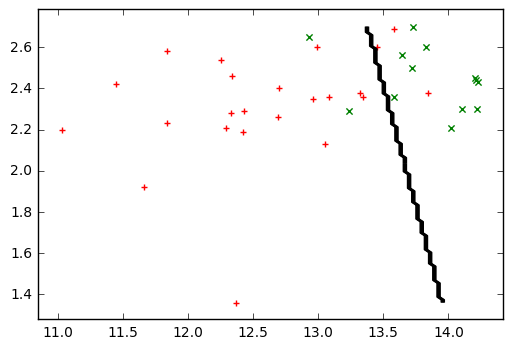

In [7]:
plot_boundary(X_test, theta, predict)
plot_points(X_test[:,1:3], y_test)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('accuracy:', accuracy_score(y_test, predict(X_test, theta)))

accuracy: 0.861111111111


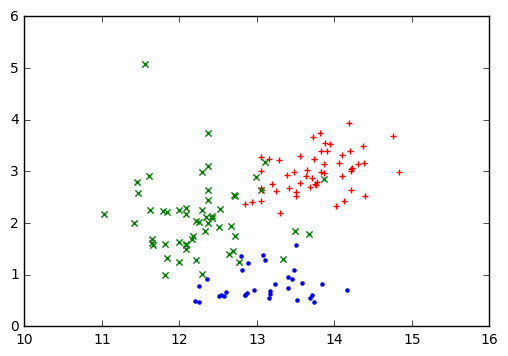

In [22]:
X = data.as_matrix(columns=['1', 'alcohol', 'flavanoids'])
y = data.as_matrix(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.matrix(label_binarize(y_train, [1, 2, 3]))

plot_points(X_train[:,1:3], y_train.argmax(axis=1))

0.69314718056
[[ 0.12676056]
 [ 1.37422535]
 [-0.0484507 ]]
0.693147152145
[[ 0.1267605 ]
 [ 1.37422448]
 [-0.04845085]]
0.670377136853
[[ 0.02225091]
 [ 0.00916104]
 [-0.27309593]]
0.670377136301
[[ 0.02225091]
 [ 0.00916104]
 [-0.27309593]]
0.467218555485
[[ 0.03777371]
 [ 0.26088714]
 [-0.01511499]]
0.467218554598
[[ 0.03777371]
 [ 0.26088713]
 [-0.01511499]]
0.441569766894
[[ 0.03073552]
 [ 0.19016864]
 [ 0.02185311]]
0.537541403646
[[ 0.04607934]
 [ 0.44238147]
 [ 0.13938733]]
0.464297144383
[[ 0.03700974]
 [ 0.30626916]
 [ 0.09545488]]
0.442862553019
[[ 0.03230815]
 [ 0.23068773]
 [ 0.06290281]]
0.438870884688
[[ 0.0307625 ]
 [ 0.20135879]
 [ 0.04338424]]
0.438870884514
[[ 0.0307625 ]
 [ 0.20135878]
 [ 0.04338423]]
0.437755442401
[[ 0.01293942]
 [-0.03266889]
 [-0.00306099]]
0.437755440626
[[ 0.01293951]
 [-0.03266776]
 [-0.00306077]]
0.437725252182
[[ 0.01587977]
 [ 0.005863  ]
 [ 0.00441068]]
0.437725252108
[[ 0.01587977]
 [ 0.005863  ]
 [ 0.00441068]]
0.311628000506
[[ 0.01106

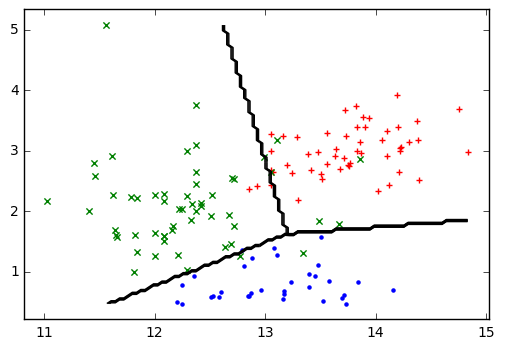

In [26]:
def train(X, y):
    result = fmin_tnc(func=cost, x0=np.zeros(3), fprime=gradient, args=(X, y[:,0]))
    return np.matrix(result[0])

thetas = [(i + 1, train(X_train, y_train[:,i])) for i in range(0,3)]

thetas = [
    (1, train(X_train, y_train[:,0])),
    (2, train(X_train, y_train[:,1])),
    (3, train(X_train, y_train[:,2]))
]

def predict2(X, thetas):
    labels = [t[0] for t in thetas]
    preds = [sigmoid(X * np.matrix(t[1]).T) for t in thetas]
    preds = np.column_stack(preds)

    argmax = preds.argmax(axis=1)
    return np.vectorize(lambda v: labels[v])(argmax)

plot_points(X_train[:,1:3], y_train.argmax(axis=1))
plot_boundary(X_train, thetas, predict2)


In [11]:
print('accuracy:', accuracy_score(y_test, predict2(X_test, thetas)))
print('precision:', precision_score(y_test, predict2(X_test, thetas), average='macro'))
print('recall:', recall_score(y_test, predict2(X_test, thetas), average='macro'))

accuracy: 0.944444444444
precision: 0.948717948718
recall: 0.939393939394


In [12]:
X = data.drop('class', 1).as_matrix()
y = data.as_matrix(columns=['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = np.matrix(label_binarize(y_train, [1, 2, 3]))

def cost2(theta, X, y, l):
    theta = np.matrix(theta)
    m = len(X)
    
    h = sigmoid(np.matmul(X, theta.T))
    y1 = np.multiply(-y, np.log(h))
    y0 = np.multiply((1 - y), np.log(1 - h))
    j = np.sum(y1 - y0) / m

    jreg = j + (1 / (2 * m)) * np.square(theta).sum()

    return jreg

def gradient2(theta, X, y, l):
    error = sigmoid(X * np.matrix(theta).T) - y
    grad = (1/len(X)) * np.matmul(X.T, error)
    lm = (l / len(X)) * np.matrix(theta).T

    return grad + lm

def train(X, y):
    result = fmin_tnc(func=cost, x0=np.zeros(14), fprime=gradient, args=(X, y[:,0]))
    return np.matrix(result[0])
thetas = [
    (1, train(X_train, y_train[:,0])),
    (2, train(X_train, y_train[:,1])),
    (3, train(X_train, y_train[:,2]))
]

print('accuracy:', accuracy_score(y_test, predict2(X_test, thetas)))
print('precision:', precision_score(y_test, predict2(X_test, thetas), average='macro'))
print('recall:', recall_score(y_test, predict2(X_test, thetas), average='macro'))

accuracy: 0.944444444444
precision: 0.925925925926
recall: 0.952380952381
